# **Optimizing Marketing Expenses for Yandex.Afisha**

## **Project Overview**
You have been offered an internship in the analytical department at Yandex.Afisha. Your first task is to **optimize marketing expenses** by analyzing user behavior, sales performance, and marketing effectiveness.

## **Available Data**
- **Website visits (June 2017 – May 2018):** Server logs with session data.
- **Orders dataset:** Details on purchases, revenue, and timestamps.
- **Marketing costs:** Expenses on various ad sources over time.

## **Key Questions to Answer**
### **Product Analysis**
- How many people use the product daily, weekly, and monthly?
- How often do users visit the platform?
- How long do sessions last?
- What is the user retention rate?

### **Sales Analysis**
- When do users start making purchases?
- How many orders do they place over time?
- What is the average purchase size?
- What is the **Lifetime Value (LTV)** of a customer?

### **Marketing Analysis**
- How much was spent overall and per source?
- What is the **Customer Acquisition Cost (CAC)**?
- How profitable are the marketing investments (**Return on Investment - ROI**)?

## **Approach**
1. **Prepare the data:**  
   - Load the datasets (`visits_log_us.csv`, `orders_log_us.csv`, `costs_us.csv`).
   - Convert timestamps, clean the data, and optimize for analysis.
   
2. **Analyze key metrics:**  
   - Calculate **DAU, WAU, MAU** to understand platform usage.
   - Find session duration and retention trends.
   - Identify conversion rates and revenue trends.

3. **Evaluate marketing efficiency:**  
   - Compare **CAC vs. LTV** for different sources.
   - Assess marketing spend distribution.
   - Determine which ad sources drive the most profitable users.

4. **Provide actionable recommendations:**  
   - Suggest where to **increase or reduce** marketing spend.
   - Identify high-value cohorts and successful acquisition strategies.
   - Optimize for better ROI and sustained business growth.

## **Final Deliverable**
The analysis will provide clear, **data-driven recommendations** on how to allocate marketing budgets effectively, ensuring **higher customer retention, profitability, and long-term success**.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1 *Data Preprocessing*

- ## **'costs_us.csv'**: Data Preprocessing


In [2]:
# Load data and display first 5 rows
try:
    costs = pd.read_csv('costs_us.csv')
except:
    costs = pd.read_csv('/datasets/costs_us.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [3]:
# Check data types and missing values 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [4]:
# Check if we have duplicates
costs.duplicated().sum()

0

In [5]:
# Convert column 'dt' to datetime
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')


In [6]:
# Find the number of unique values in the column and how they are distributed
costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [7]:
# Bacause column 'source_id' has a small number of unique values relative to the dataset size We could convert it to type 'category'
costs['source_id'] = costs['source_id'].astype('category')
# Final check of this table
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


### Result of Optimization

- Memory usage reduced to: 42.7 KB (a 28% reduction)
- Correct date format for easy time-based analysis.

- ## **'orders_log_us.csv'**: Data Preprocessing

In [8]:
# Load data and display first 5 rows
try:
    orders = pd.read_csv('orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')

orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
# Let's fix names of columns
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [10]:
# Check data types and missing values 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
# Check if we have duplicates
orders.duplicated().sum()

0

In [12]:
orders['uid'].describe()

count    5.041500e+04
mean     9.098161e+18
std      5.285742e+18
min      3.135781e+14
25%      4.533567e+18
50%      9.102274e+18
75%      1.368290e+19
max      1.844617e+19
Name: uid, dtype: float64

It looks like IDs were wrongly stored as signed integers, so I decided to convert them to absolute value

In [13]:
# Check if we could convert column "Uid" to format "int32" 
orders['uid'].max()

18446167067214817906

In [14]:
# int32 supports values only up to 2,147,483,647, while "Uid" values go up to 18,446,167,067,214,817,906, which is way beyond its limit.

In [15]:
# convert column "Uid" to foormat "int64" because Pandas primarily supports int64, 
# while uint64 is less commonly used and may cause unexpected behavior in some operations, and to absolute value
orders['uid'] = orders['uid'].astype('int64').abs()

In [16]:
# Convert column 'Buy Ts' to datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')


In [17]:
# Final check of this table
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


### Result of Optimization
- Correct data types for analysis (datetime64[ns] for dates, int64 for IDs).
- Avoids issues with unsigned integers (uint64).
- Ensures better performance in time-based operations.
- Memory usage remains: 1.2 MB (no significant change).

- ## **'visits_log_us.csv'**: Data Preprocessing

In [18]:
# Load data and display first 5 rows
try:
    visits = pd.read_csv('visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [19]:
# Let's fix names of columns
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [20]:
# Check data types and missing values 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [21]:
# Check if we have duplicates
visits.duplicated().sum()

0

In [22]:
# Find the number of unique values in the column and how they are distributed
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [23]:
# Bacause column 'Device' has a small number of unique values relative to the dataset size We could convert it to type 'category'
visits['device'] = visits['device'].astype('category')


In [24]:
# Convert column 'End Ts' to datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [25]:
# Convert column 'Start Ts' to datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [26]:
# Find the number of unique values in the column and how they are distributed
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [27]:
# # Bacause column 'Source_id' has a small number of unique values relative to the dataset size We could convert it to type 'category'
visits['source_id'] = visits['source_id'].astype('category')


In [28]:
visits['uid'].describe()

count    3.594000e+05
mean     9.202557e+18
std      5.298433e+18
min      1.186350e+13
25%      4.613407e+18
50%      9.227413e+18
75%      1.372824e+19
max      1.844668e+19
Name: uid, dtype: float64

It looks like IDs were wrongly stored as signed integers, so I decided to convert them to absolute value

In [29]:
# convert column "Uid" to foormat "int64" because Pandas primarily supports int64, 
# while uint64 is less commonly used and may cause unexpected behavior in some operations
visits['uid'] = visits['uid'].astype('int64').abs()

In [30]:
#final check
visits.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  category      
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 8.9 MB


### Result of Optimization
- Memory usage reduced by ~35% (13.7 MB → 8.9 MB).
- Faster performance in grouping and filtering operations.
- Correct date format for easy time-based analysis.

# Step 2. Reports and calculating metrics

# Product

# - **How many people use it every day, week, and month?**

In [31]:
# Extract relevant date components
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date


In [32]:
# Calculate DAU (Daily Active Users)
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
# Display results
print(f"Average Daily Active Users (DAU): {dau_total.values[0]:.2f}")

Average Daily Active Users (DAU): 907.99


In [33]:
# Calculate WAU (Weekly Active Users)
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

print(f"Average Weekly Active Users (WAU): {wau_total.values[0]:.2f}")

Average Weekly Active Users (WAU): 5716.25


In [34]:
# Calculate MAU (Monthly Active Users)
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
print(f"Average Monthly Active Users (MAU): {mau_total.values[0]:.2f}")

Average Monthly Active Users (MAU): 23228.42


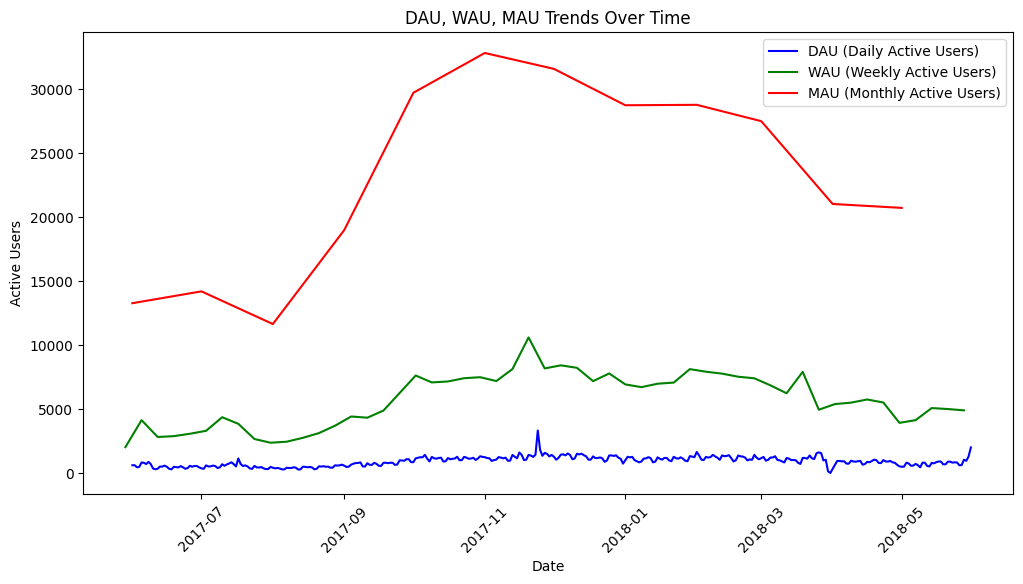

In [35]:
# Grouping users by day, week, and month
dau = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()
wau = visits.groupby(visits['start_ts'].dt.to_period('W'))['uid'].nunique()
mau = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].nunique()

# Convert indexes to datetime format for proper plotting
dau.index = pd.to_datetime(dau.index)
wau.index = wau.index.to_timestamp()  # Convert PeriodIndex to Timestamp
mau.index = mau.index.to_timestamp()  # Convert PeriodIndex to Timestamp

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dau.index, dau, label='DAU (Daily Active Users)', color='blue')
plt.plot(wau.index, wau, label='WAU (Weekly Active Users)', color='green')
plt.plot(mau.index, mau, label='MAU (Monthly Active Users)', color='red')

plt.xlabel("Date")
plt.ylabel("Active Users")
plt.title("DAU, WAU, MAU Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Conclusion: DAU, WAU, MAU Trends**

- **DAU (Daily Active Users)**  
  - Stable but low compared to WAU and MAU  
  - Small spikes, possibly linked to campaigns  

- **WAU (Weekly Active Users)**  
  - Shows growth over time  
  - Peaks suggest periodic engagement increases  

- **MAU (Monthly Active Users)**  
  - Strong upward trend until early 2018  
  - Decline after peak suggests user drop-off  


Let's look more closely on DAU

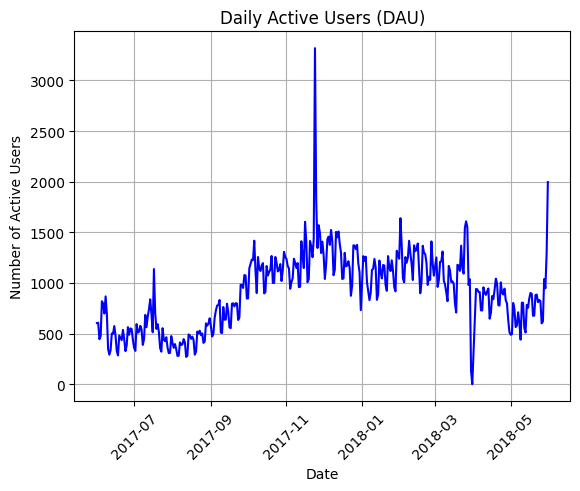

In [36]:
sns.lineplot(x=dau.index, y=dau, color="blue")
plt.title("Daily Active Users (DAU)")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**DAU**
- **Stable growth:** DAU steadily increased from June 2017 to early 2018, indicating a growing user base and engagement.
- **Peak in November 2017:** The highest DAU was recorded at the end of November 2017. This could be linked to a **Black Friday** promotion or a successful marketing campaign.
- **Fluctuations in early 2018:** After the peak, DAU showed a **slight decline**, but remained relatively stable.
- **Sharp drop in March 2018:** A sudden decrease in DAU in late March 2018 suggests possible issues such as **technical failures, reduced marketing efforts, or seasonal factors**.
- **Final spike in May 2018:** A slight **increase in May 2018** might indicate a new marketing initiative or organic user growth.

Let's look more closely on MAU

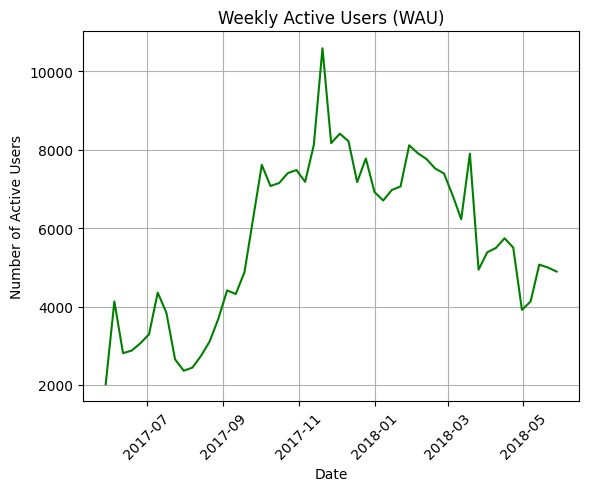

In [37]:
sns.lineplot(x=wau.index, y=wau, color="green")
plt.title("Weekly Active Users (WAU)")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**WAU**
- **Steady Growth Until Late 2017:**  
  From June to November 2017, WAU **steadily increased**, suggesting a successful acquisition strategy and growing user interest.
- **Sharp Peak in November 2017:**  
  A **significant spike in WAU** is observed in **November 2017**, likely due to a major marketing campaign, seasonal promotions, or special events.
- **Fluctuations in Early 2018:**  
  After the peak, WAU **fluctuated with a downward trend**. This could indicate **lower engagement or a decrease in newly acquired users**.
- **Significant Drop in March 2018:**  
  WAU hit a **notable low point in March 2018**, aligning with a similar dip in DAU, which may suggest a loss of user engagement or an issue with marketing effectiveness.
- **Recovery and Stabilization in Q2 2018:**  
  After the decline, WAU **began to stabilize**, indicating a **core group of engaged users remained active**.

Let's look more closely on MAU

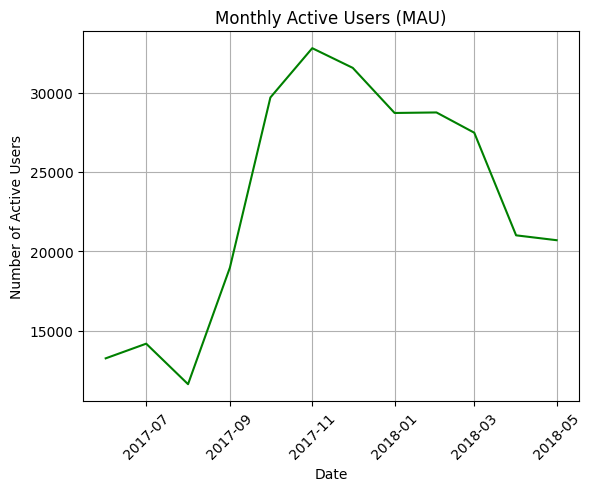

In [38]:
sns.lineplot(x=mau.index, y=mau, color="green")
plt.title("Monthly Active Users (MAU)")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**MAU**
- **Rapid Growth in Q3 2017:**  
  MAU steadily increased from **July to November 2017**, showing a significant rise in active users. This indicates successful **marketing efforts, product growth, or seasonal demand**.
- **Peak in November 2017:**  
  The highest **monthly engagement occurred in November 2017**, aligning with the observed spikes in WAU and DAU. This suggests **a strong acquisition campaign or high seasonal demand**.
- **Gradual Decline in Early 2018:**  
  After the peak, MAU **declined but remained stable** around **January-February 2018**, meaning a portion of users continued to engage with the product.
- **Steep Drop in Q2 2018:**  
  By **March-April 2018**, MAU **dropped sharply**, indicating a **loss of retained users** or reduced effectiveness of marketing efforts.


**Conclusion:**
- Since DAU and WAU are relatively stable while MAU declines, this suggests a retention issue rather than a traffic issue.
- Users are still engaging daily and weekly, but fewer people return month over month.
- This indicates that new users are dropping off after a short time, rather than a general loss of traffic.

# - **How many sessions are there per day**

In [39]:
# Group by date and user, then count sessions per user
sessions_per_user = visits.groupby([visits['start_ts'].dt.date, 'uid'])['uid'].count().reset_index(name='sessions')
# Aggregate to get the average number of sessions per user per day
sessions_per_user_per_day = sessions_per_user.groupby('start_ts')['sessions'].mean().round(2).reset_index()
sessions_per_user_per_day.columns = ["date", "avg_sessions_per_user"]

print(sessions_per_user_per_day.head())


         date  avg_sessions_per_user
0  2017-06-01                   1.10
1  2017-06-02                   1.08
2  2017-06-03                   1.07
3  2017-06-04                   1.07
4  2017-06-05                   1.09


In [40]:
sessions_per_user_per_day["avg_sessions_per_user"].describe()

count    364.000000
mean       1.082390
std        0.021321
min        1.000000
25%        1.070000
50%        1.080000
75%        1.090000
max        1.220000
Name: avg_sessions_per_user, dtype: float64

In [41]:
# Find the date where session count is max and min
date_max = sessions_per_user_per_day.loc[sessions_per_user_per_day['avg_sessions_per_user'].idxmax(), 'date']
date_min = sessions_per_user_per_day.loc[sessions_per_user_per_day['avg_sessions_per_user'].idxmin(), 'date']
print('peak of session per user: ', date_max)
print('min of session per user: ', date_min)

peak of session per user:  2017-11-24
min of session per user:  2018-03-31


In [42]:
import matplotlib.dates as mdates

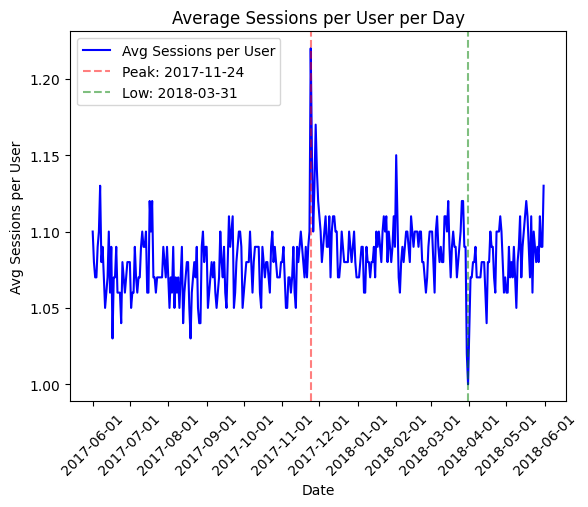

In [43]:
plt.plot(sessions_per_user_per_day["date"], sessions_per_user_per_day["avg_sessions_per_user"], 
         label="Avg Sessions per User", color="blue")

# Add vertical lines for max and min session days
plt.axvline(x=date_max, color="red", linestyle="--", label=f"Peak: {date_max}", alpha=0.5)
plt.axvline(x=date_min, color="green", linestyle="--", label=f"Low: {date_min}", alpha=0.5)

# Format X-axis for readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Avg Sessions per User")
plt.title("Average Sessions per User per Day")
plt.legend()
plt.show()

**Conclusion on Average Sessions per User per Day**
The average number of sessions per user per day remains relatively stable, fluctuating around 1.05 - 1.15 sessions per user. However, there are two key anomalies:

**Peak on November 24, 2017**

This date saw the highest spike in sessions per user.
The increase might be related to a promotional event, seasonal demand (Black Friday), or an aggressive marketing campaign.
**Drop on March 31, 2018**

The lowest engagement occurred on this date.
This could indicate a technical issue, a holiday, or a shift in user behavior.
Overall, users tend to visit the platform about once per day, but key events drive short-term fluctuations. Understanding these peaks and lows can help optimize engagement strategies, such as timing promotions or improving user retention efforts.

# - **What is the length of each session**

In [44]:
# Calculate session duration in seconds
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() 
print("Session Lengths:\n", visits[['uid', 'session_length']].head())

# Average session duration
avg_session_length = visits['session_length'].mean()
print(f"Average session length: {avg_session_length:.2f} seconds")


Session Lengths:
                    uid  session_length
0  1567487796173571554          1080.0
1   104060357244891740          1680.0
2  7459035603376831527             0.0
3  2272063814375341402          1440.0
4  8477049253672870448             0.0
Average session length: 643.03 seconds


In [45]:
visits['session_length'].describe()


count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

In [46]:
#Let's check 
mode_length = visits['session_length'].mode().round(2)
print("Mode of session length:", mode_length.tolist())

Mode of session length: [60.0]


In [47]:
negative_sessions = visits[visits['session_length'] < 0]
print(f"Number of negative session lengths: {negative_sessions.shape[0]}")


Number of negative session lengths: 2


In [48]:
# We have only 2 negative session length. Negative values are a small percentage, we can remove them:
visits = visits[visits['session_length'] >= 0]


<AxesSubplot:>

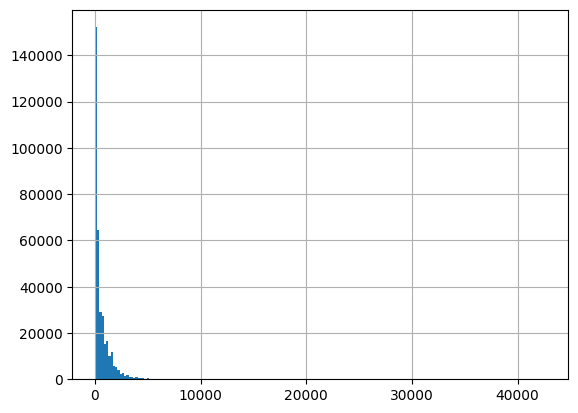

In [49]:
visits['session_length'].hist(bins=200)


In [50]:
visits['session_length'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

**Session Length Analysis**

Session Duration Insights

- Mode session length (most common value): 60 seconds
- Median session length (50%): 5 minutes (300s)
- Mean session length: ~10.7 minutes (643s)
- 75% of sessions are under 14 minutes (840s)
- Some very long sessions exist (Max = 42,660s ≈ 12 hours)

**Key Observations**

-Most users have short sessions, but a subset of users stays significantly longer.
- The histogram shows a long tail, meaning that although most sessions are short, some users engage with the platform for extended periods.
- Mode is the most appropriate metric in this case because it best represents the typical user experience, while mean and median are influenced by outliers in the long tail.
- The peak at 60 seconds suggests that many users quickly leave the platform, possibly after a brief interaction or browsing session.

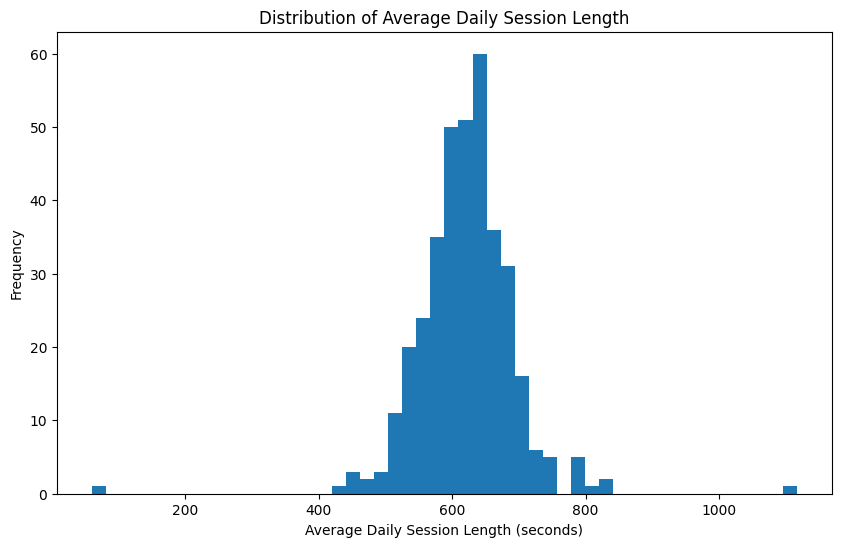

In [51]:
# Convert timestamps to date format
visits['date'] = visits['start_ts'].dt.date  

# Group by date and calculate the average session length per day
avg_session_by_date = visits.groupby('date')['session_length'].mean().reset_index()

# Plot histogram 
plt.figure(figsize=(10, 6))
plt.hist(avg_session_by_date['session_length'], bins=50)
plt.xlabel("Average Daily Session Length (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Daily Session Length")
plt.show()

**Conclusion: Average Daily Session Length Distribution**

- **Most sessions last 8-11 minutes**, with a normal distribution and slight right skew.  
- **Long tail effect reduced** by using daily averages, making the data more reliable.  
- **Few extreme values** suggest special events or anomalies.  


# - **How often do users come back?**

In [52]:
# Retention Rate
# Create a cohort: first visit date per user
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()


,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,68042923879230,2017-10-04 16:01:00
3,122254899959089,2017-12-27 13:27:00
4,187667010442558,2018-01-01 16:29:00


In [53]:
#erging to the original dataset
visits = visits.merge(first_visit, how='inner',on=['uid'])
visits.head()


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_length,date,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1567487796173571554,2017,12,51,2017-12-20,1080.0,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680.0,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2272063814375341402,2018,5,20,2018-05-20,1440.0,2018-05-20,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,2272063814375341402,2018,3,10,2018-03-09,1680.0,2018-03-09,2018-03-09 20:05:00


Our cohorts and age calculations will be done on monthly calculations. We will define two parameters:
- 
cohort: monthly cohort when the user registered/had first session, basically turning his date of registration into month to understand what month he registered in, thus which cohort he belongs to- timeage: it's the difference between any current session and first_session, we will also calculate it in 'month' to keep all of the units on one scale) Basically age answers the question : "How long did it pass after registration till the user made this action?"

In [54]:
# Cohort - month of first visit
visits['cohort'] = visits['first_visit'].dt.to_period('M')

# month since first visit
visits['months'] = (visits['end_ts'].dt.year - visits['first_visit'].dt.year) * 12 + \
                   (visits['end_ts'].dt.month - visits['first_visit'].dt.month)

# Display result
visits[['uid', 'first_visit', 'end_ts', 'cohort', 'months']].head()


,uid,first_visit,end_ts,cohort,months
0,1567487796173571554,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12,0
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02,0
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07,0
3,2272063814375341402,2018-03-09 20:05:00,2018-05-20 11:23:00,2018-03,2
4,2272063814375341402,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03,0


In [55]:
#lets see how many users were active from certain cohorts on a certain time after registration
cohorts = visits.pivot_table(index='cohort',
                  columns='months',
                  values='uid',
                  aggfunc='nunique').fillna(0)
cohorts

months,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,13255.0,1047.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13136.0,741.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,0.0
2017-08,10177.0,784.0,641.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,0.0,0.0
2017-09,16696.0,1433.0,1157.0,847.0,658.0,632.0,599.0,404.0,381.0,0.0,0.0,0.0
2017-10,25971.0,2044.0,1358.0,1012.0,890.0,837.0,555.0,529.0,0.0,0.0,0.0,0.0
2017-11,27246.0,2136.0,1202.0,1054.0,919.0,638.0,594.0,0.0,0.0,0.0,0.0,0.0
2017-12,25267.0,1411.0,960.0,786.0,512.0,481.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01,22614.0,1360.0,890.0,565.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02,22194.0,1269.0,564.0,447.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


retention is a % of those who returned from those who registered. Column months=0 includes all of the users that registered in a cohort, thus, to calculate Retention in % we divide columns for all months by column when months=0

In [56]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

months,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,1.0,0.078989,0.053791,0.061411,0.068578,0.071445,0.061034,0.057790,0.052358,0.050849,0.040664,0.044964
2017-07,1.0,0.056410,0.051309,0.056181,0.058237,0.048188,0.045371,0.045752,0.038825,0.028624,0.027482,0.000000
2017-08,1.0,0.077036,0.062985,0.062789,0.050113,0.044021,0.036356,0.039501,0.027906,0.026039,0.000000,0.000000
2017-09,1.0,0.085829,0.069298,0.050731,0.039411,0.037853,0.035877,0.024197,0.022820,0.000000,0.000000,0.000000
2017-10,1.0,0.078703,0.052289,0.038967,0.034269,0.032228,0.021370,0.020369,0.000000,0.000000,0.000000,0.000000
2017-11,1.0,0.078397,0.044117,0.038685,0.033730,0.023416,0.021801,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12,1.0,0.055844,0.037994,0.031108,0.020264,0.019037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01,1.0,0.060140,0.039356,0.024985,0.020253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02,1.0,0.057178,0.025412,0.020141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


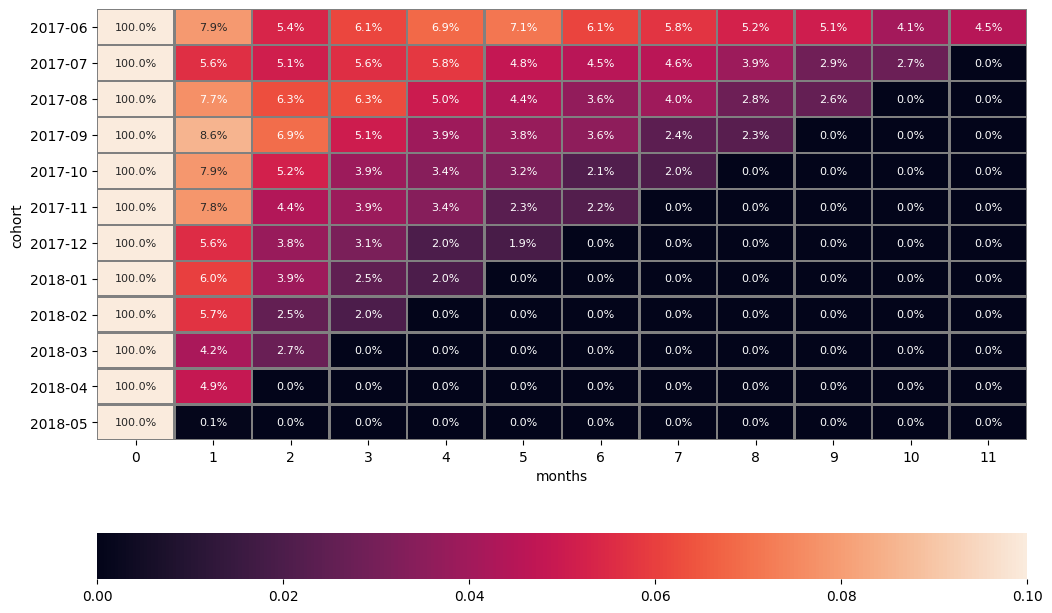

In [57]:
# the first line just formats cohort into a str for a nicer output
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', 
            vmax=0.1, cbar_kws={'orientation': 'horizontal'}, 
            annot_kws={"size": 8})

plt.show()

In [58]:
# Calculate overall retention by averaging all cohort values
overall_retention = retention.mean()
print("Overall Retention Rate:\n", overall_retention)


Overall Retention Rate:
 months
0     1.000000
1     0.059976
2     0.038634
3     0.032083
4     0.027071
5     0.023016
6     0.018484
7     0.015634
8     0.011826
9     0.008793
10    0.005679
11    0.003747
dtype: float64


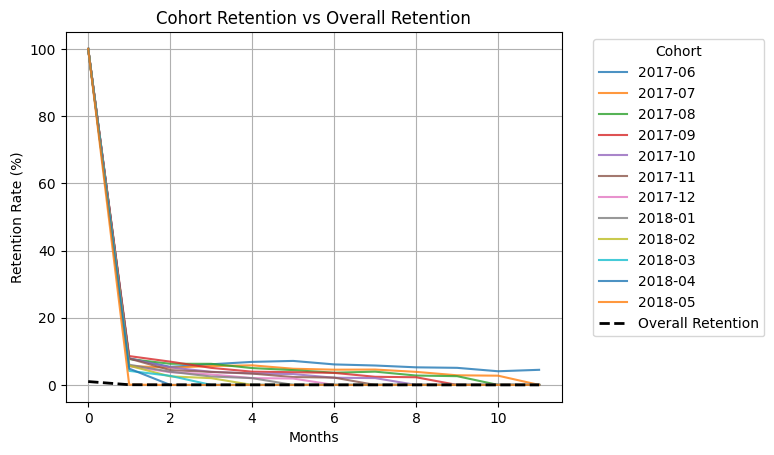

In [59]:
# Plot each cohort
for cohort in retention.index:
    plt.plot(retention.columns, retention.loc[cohort] * 100, label=cohort, alpha=0.8)

# Plot overall retention
plt.plot(retention.columns, overall_retention, label="Overall Retention", color="black", linewidth=2, linestyle="--")

plt.xlabel("Months")
plt.ylabel("Retention Rate (%)")
plt.title("Cohort Retention vs Overall Retention")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Cohort Retention Analysis Conclusion**

1. **Sharp Drop in Retention**  
   - All cohorts experience a significant decline in retention after the first month, with most users not returning.

2. **Stabilization Over Time**  
   - After the initial drop, retention rates remain relatively stable across cations.

3. **Comparison with Overall Retention**  
   - The **black dashed line** represents the overall retention rate, closely following individual cohort trends.
   - Some cohorts perform slightly better than the average, but no major deviations are observed.

4. **Best and Worst Cohorts**  
   - Some early cohorts (e.g., **2097-06, 2017-07**) maintain slightly higher retention over time.
   - Newer cohorts (e.g., **2318-04, 2018-05**) show weaker retention, indicating possible changes in user behavior or platform ormance.



# Sales

# - **When do people start buying?**

Conversion depicts how long does it take from first visit to the purchase in days.

In [60]:
# Get first order date per user
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date']
first_purchase.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,577006494733710,2017-10-17 10:16:00
2,587863483079904,2018-02-18 19:34:00
3,1142920977281457,2018-03-26 22:54:00
4,1336537795138412,2017-09-22 23:55:00


In [61]:
# Merge with first visit data
purchases = first_visit.merge(first_purchase, on='uid', how='left')
purchases.head()

,uid,first_visit,first_purchase_date
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,68042923879230,2017-10-04 16:01:00,NaT
3,122254899959089,2017-12-27 13:27:00,NaT
4,187667010442558,2018-01-01 16:29:00,NaT


In [62]:
# Filter users who made a purchase
purchases = purchases.dropna()
purchases.head()


,uid,first_visit,first_purchase_date
6,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
15,577006494733710,2017-10-17 10:05:00,2017-10-17 10:16:00
17,587863483079904,2017-11-07 10:01:00,2018-02-18 19:34:00
36,1142920977281457,2017-08-07 11:51:00,2018-03-26 22:54:00
44,1336537795138412,2017-09-22 23:48:00,2017-09-22 23:55:00


In [63]:
# Calculate conversion delay (days)
purchases['conversion'] = (purchases['first_purchase_date'] - purchases['first_visit']).dt.days
purchases


,uid,first_visit,first_purchase_date,conversion
6,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
15,577006494733710,2017-10-17 10:05:00,2017-10-17 10:16:00,0
17,587863483079904,2017-11-07 10:01:00,2018-02-18 19:34:00,103
36,1142920977281457,2017-08-07 11:51:00,2018-03-26 22:54:00,231
44,1336537795138412,2017-09-22 23:48:00,2017-09-22 23:55:00,0
...,...,...,...,...
228134,9222179515197516675,2018-02-01 11:39:00,2018-02-01 12:19:00,0
228144,9222413955005962633,2017-11-26 12:26:00,2018-02-10 22:40:00,76
228151,9222738372043548673,2017-12-26 11:11:00,2017-12-26 11:15:00,0
228161,9223037012353896671,2017-10-31 22:36:00,2017-10-31 22:56:00,0


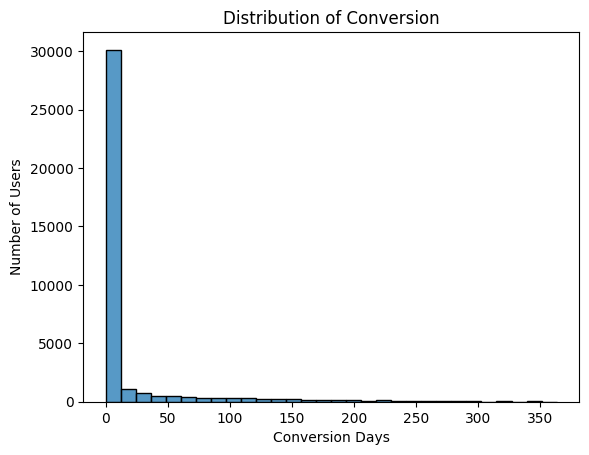

In [64]:
sns.histplot(purchases, x="conversion", bins=30)
plt.xlabel("Conversion Days")
plt.ylabel("Number of Users")
plt.title("Distribution of Conversion")
plt.show()


In [65]:
purchases['conversion'].value_counts(normalize = True)*100


0      72.181913
1       2.768119
2       1.541494
3       1.188292
4       0.887112
         ...    
312     0.002738
309     0.002738
341     0.002738
325     0.002738
337     0.002738
Name: conversion, Length: 345, dtype: float64

In [66]:
total_users = visits['uid'].nunique()
converted_users = purchases['uid'].nunique()

conversion_rate = (converted_users / total_users) * 100
print(f"Overall Conversion Rate: {conversion_rate:.1f}%")


Overall Conversion Rate: 16.0%


**Conversion Delay Analysis**

**Key Observation**
- Overall Conversion Rate: 16.0%
- The majority of users convert on the **same day** they visit the platform (~72%).
- The conversion rate drops significantly after **the first day**.


**Recommendations:**
- Improve **onboarding experience** to maximize same-day conversions.
- Consider targeted **follow-up campaigns** for users who don't convert within the first few days.
- Analyze user behavior to identify factors influencing **delayed conversions**.

# - *How many orders do they make during a given period of time?*

In [67]:
# Get first order date per user
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date_by_customers.rename(columns={'buy_ts': 'first_order_date'}, inplace=True)

# Merge with orders dataset
orders = orders.merge(first_order_date_by_customers, on='uid', how='left')

# Extract first purchase and order month
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [68]:
# Count unique buyers in each cohort
cohort_sizes = orders.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

In [69]:
# Group by first_order_month and order_month, count revenue and orders
cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
cohorts.rename(columns={'uid': 'total_orders'}, inplace=True)
# Merge with cohort sizes to add number of buyers
cohorts = cohorts.merge(cohort_sizes, on='first_order_month')


In [70]:
# Calculate the age of each cohort in months
cohorts['cohort_age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
cohorts['cohort_age'] = cohorts['cohort_age'].round().astype(int)


In [71]:
# Merge with cohort sizes to add number of buyers
cohorts = cohorts.merge(cohort_sizes, on='first_order_month')


In [72]:
# Calculate orders per customer
cohorts['orders_per_customer'] = cohorts['total_orders'] / cohorts['n_buyers_y']


In [73]:
# Create a pivot table
orders_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_age', values='orders_per_customer', aggfunc='mean').cumsum(axis=1).round(2)
orders_pivot.index = orders_pivot.index.strftime('%Y-%m')
orders_pivot

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,NaN
2017-08,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,NaN,NaN
2017-09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,NaN,NaN,NaN
2017-10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,NaN,NaN,NaN,NaN
2017-11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,NaN,NaN,NaN,NaN,NaN
2017-12,1.15,1.21,1.26,1.30,1.32,1.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.12,1.19,1.24,1.25,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.12,1.18,1.21,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


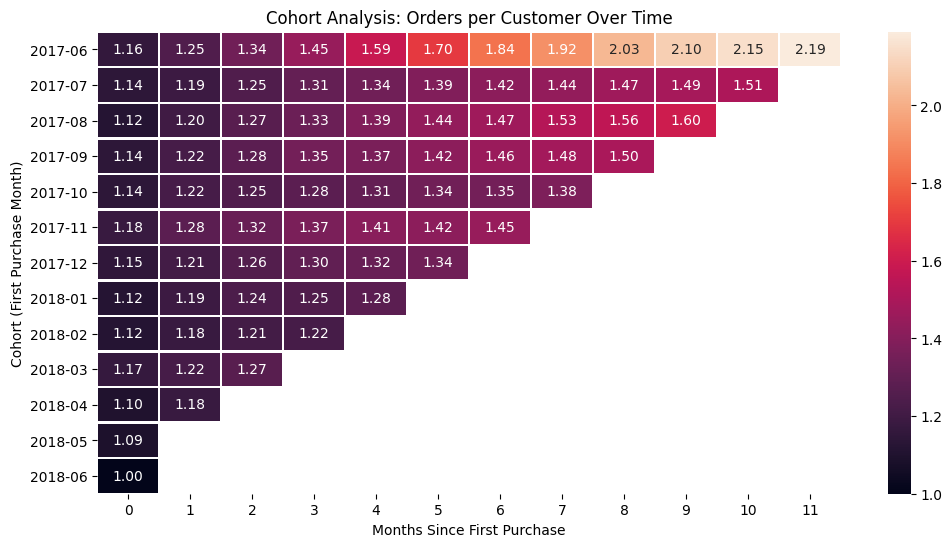

In [74]:
plt.figure(figsize=(12, 6))
sns.heatmap(orders_pivot, annot=True, fmt='.2f', linewidths=1)
plt.title("Cohort Analysis: Orders per Customer Over Time")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")
plt.show()

**Conclusion: Orders per Customer Over Time**


**Steady Growth in Orders Per Customer**  
- Customers tend to **place multiple orders over time**.  
- The **June 2017 cohort** has the highest long-term engagement, reaching **2.19 orders per customer** by month 11.  
- Other early cohorts (July–October 2017) also show consistent order growth, exceeding **1.5 orders per customer** within 6–7 months.  

**Decline in Recent Cohorts**  
- **Newer cohorts (April–June 2018) show fewer repeat purchases** beyond the first few months.  
- These users place **only 1–1.1 orders per customer** in the early months, indicating **weaker retention and engagement**.  

**Long-Term Engagement Matters**  
- The **best-performing cohorts (June–October 2017) continue to order even after 6+ months**.  
- Older cohorts build more **loyal customers**, while newer ones show **weaker repeat purchase behavior**.  

# - **What is the average purchase size?** 

Average overall revenue 4.999646930477041
buy_ts
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
2018-06    3.420000
Freq: M, Name: revenue, dtype: float64


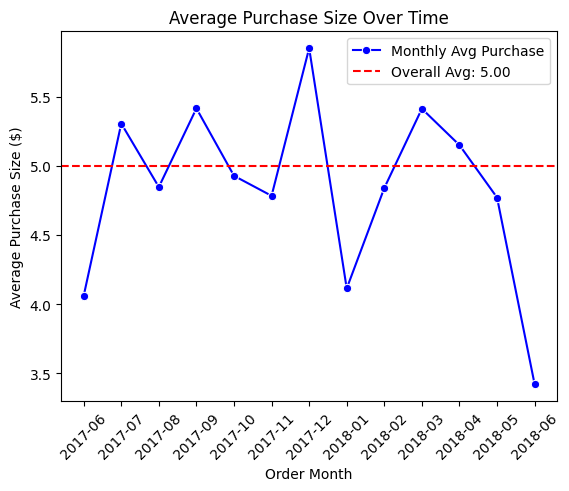

In [75]:
# Calculate the average purchase size per month
avg_purchase_per_month = orders.groupby(orders['buy_ts'].dt.to_period('M'))['revenue'].mean()
avg_purchase = orders['revenue'].mean()
print('Average overall revenue', avg_purchase)
print(avg_purchase_per_month)
# Plot the trend
sns.lineplot(x=avg_purchase_per_month.index.astype(str), y=avg_purchase_per_month.values, marker='o', color='blue', label='Monthly Avg Purchase')

# Add a horizontal line for the overall average purchase size
plt.axhline(y=avg_purchase, color='red', linestyle='--', label=f'Overall Avg: {avg_purchase:.2f}')

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Order Month")
plt.ylabel("Average Purchase Size ($)")
plt.title("Average Purchase Size Over Time")
plt.legend()
plt.show()

**Average Purchase Size Over Time**
- The **average purchase size** changed over time, with some months having bigger purchases than others.
- The **highest purchase size** was in **December 2017**, likely due to holiday shopping or special promotions.
- The **lowest purchase size** was in **June 2018**, which could mean fewer high-value purchases or a seasonal decline.
- After a small drop in **January 2018**, the purchase size increased again until April before falling.


# - **How much money do they bring? (LTV)**


Gross profit calculated as revenue x margin rate. For this project margin rate=1, so gp=revenue

In [76]:
# Group data by cohorts 
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
orders_grouped_by_cohorts.rename(columns={'uid': 'total_orders'}, inplace=True)

# Merge with cohort sizes
report = orders_grouped_by_cohorts.merge(cohort_sizes, on='first_order_month')

# Calculate cohort age (months since first order)
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

# Calculate LTV 
report['ltv'] = report['revenue'] / report['n_buyers'] 
report.head()

,first_order_month,order_month,revenue,total_orders,n_buyers,age,ltv
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,226,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,292,2023,4,1.022531


In [77]:
#  Create LTV cohort table
ltv_cohort = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean'
).cumsum(axis=1).round(2)
ltv_cohort.index = ltv_cohort.index.strftime('%Y-%m')

ltv_cohort.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


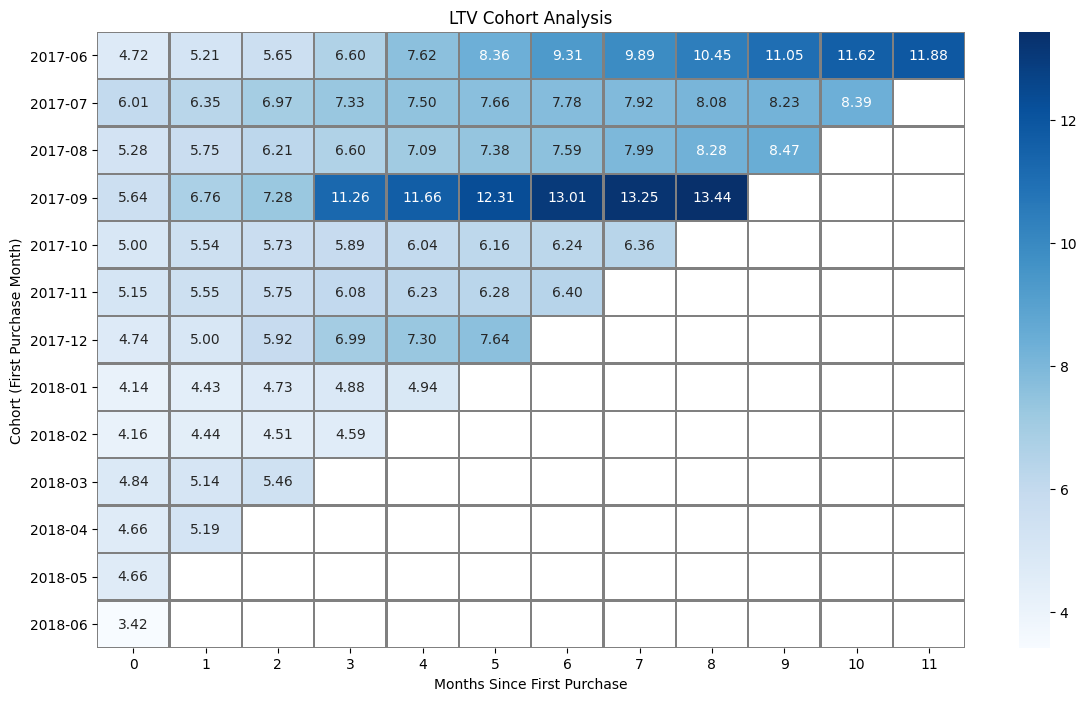

In [78]:
plt.figure(figsize=(14, 8))
sns.heatmap(ltv_cohort, annot=True, fmt=".2f", cmap="Blues", linecolor='grey', linewidths=1)
plt.title("LTV Cohort Analysis")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")
plt.show()


In [79]:
avg_ltv = report['ltv'].mean().round(2)
print('Average LTV over time : ', avg_ltv)

Average LTV over time :  1.15


**LTV Conclusion**

The **Lifetime Value (LTV)** of customers increases steadily over time across most cohorts, meaning that users continue to generate revenue after their initial purchase.

- Customers from **September 2017** have the highest LTV, reaching **13.44** by their 8th month, which indicates strong retention and spending behavior.
- The **LTV trend is generally positive**, with older cohorts accumulating higher LTV values.
- Recent cohorts (e.g., **March - June 2018**) show lower LTV values, which may be due to limited time for revenue accumulation.
- Average LTV over time :  1.15


# Marketing

# - **How much money was spent? Overall, per source and over time.**

In [80]:
#Calculate Total Marketing Spend (Overall)
total_spent = costs["costs"].sum()
print("Total Marketing Spend: ", total_spent)


Total Marketing Spend:  329131.62


In [81]:
# Calculate total spend per source
total_spent_per_source = costs.groupby("source_id")["costs"].sum().reset_index()
# Calculate monthly total spend
monthly_spent = costs.groupby(costs['dt'].dt.to_period("M"))["costs"].sum().reset_index()
monthly_spent["dt"] = monthly_spent["dt"].astype(str)
# Calculate monthly spend per source
monthly_spent_per_source = costs.groupby([costs['dt'].dt.to_period("M"), "source_id"])["costs"].sum().unstack()
monthly_spent_per_source

source_id,1,2,3,4,5,9,10
dt,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [82]:
# Aggregate total marketing spend over time
total_costs_over_time = costs.groupby('dt')['costs'].sum().reset_index()
total_costs_over_time.columns = ['date', 'total_spent']
total_costs_over_time


,date,total_spent
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


In [83]:
# Aggregate total marketing spend per source
total_costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
total_costs_per_source.columns = ['source_id', 'total_spent']
total_costs_per_source

,source_id,total_spent
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [84]:
# Total spend per month
costs['month'] = costs['dt'].dt.to_period('M')  # Convert to month-year format
total_spent_per_month = costs.groupby('month')['costs'].sum().reset_index()
total_spent_per_month.columns = ['month', 'total_spent']
total_spent_per_month

,month,total_spent
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


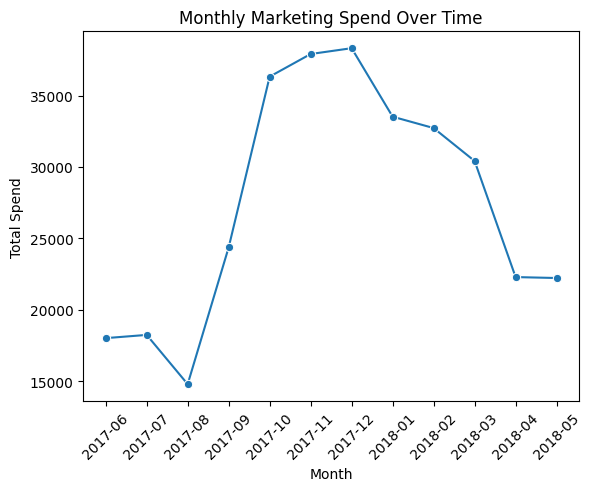

In [85]:
sns.lineplot(x=total_spent_per_month['month'].astype(str), y=total_spent_per_month['total_spent'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.title("Monthly Marketing Spend Over Time")
plt.show()

<Figure size 1200x600 with 0 Axes>

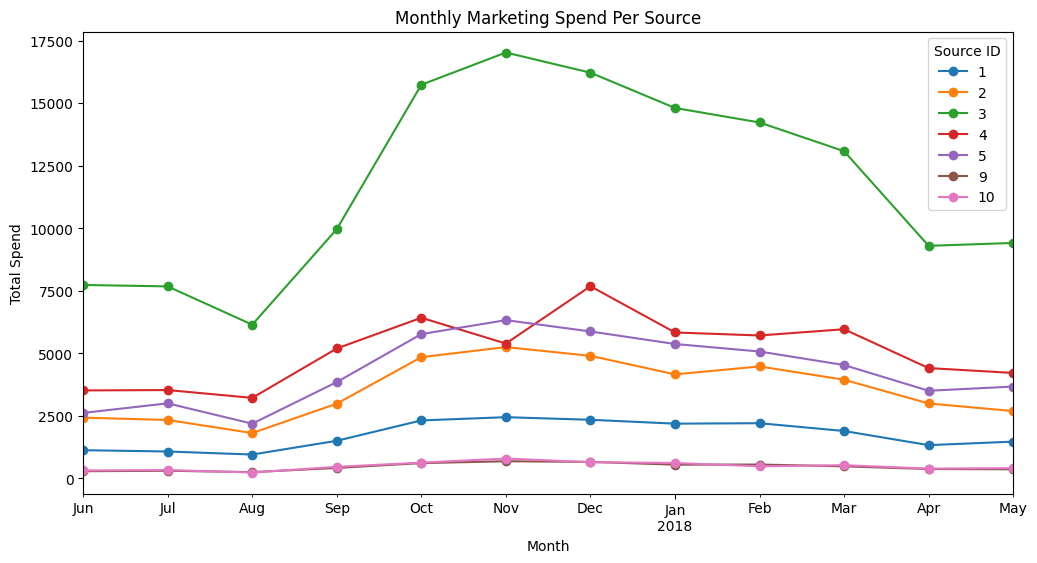

In [86]:
monthly_spent_per_source.index = monthly_spent_per_source.index.to_timestamp()

# Plot monthly marketing spend per source
plt.figure(figsize=(12, 6))
monthly_spent_per_source.plot(kind="line", figsize=(12, 6), marker="o")

plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.title("Monthly Marketing Spend Per Source")
plt.legend(title="Source ID")
plt.show()

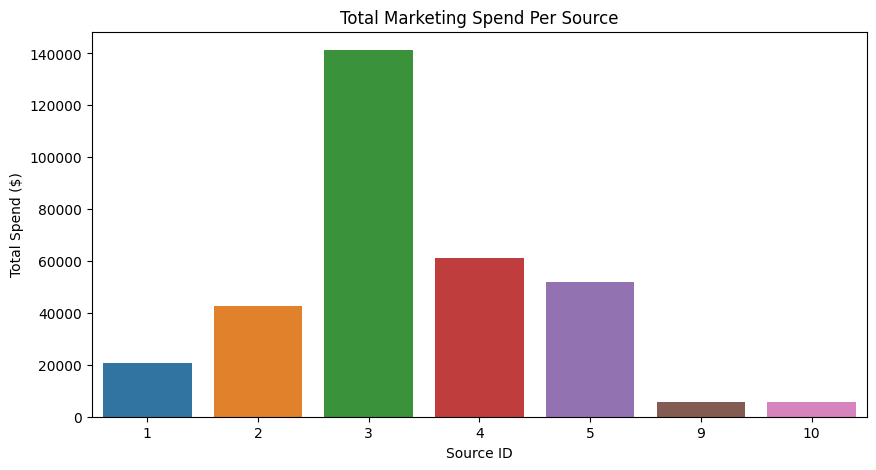

In [87]:
# Plot total marketing spend per source
plt.figure(figsize=(10, 5))
sns.barplot(x="source_id", y="costs", data=total_spent_per_source)
plt.xlabel("Source ID")
plt.ylabel("Total Spend ($)")
plt.title("Total Marketing Spend Per Source")
plt.show()

**Conclusion: Marketing Spend Per Source**
Marketing spending changed a lot over time, with a big peak in November 2017, likely due to seasonal promotions. There was also a drop around March-April 2018, possibly from budget changes.

Looking at spend by source, *Source ID 3* got the most money, while Sources 9 and 10 had very little. 

# - **How much did customer acquisition from each of the sources cost?**

Let's clculate Monthly CAC

In [88]:
# Get the number of unique buyers per month
buyers_per_month = orders.groupby('first_order_month')['uid'].nunique().reset_index()
buyers_per_month.columns = ['month', 'unique_buyers']
buyers_per_month['month'] = buyers_per_month['month'].dt.to_period('M')  
buyers_per_month

,month,unique_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [89]:
# Get marketing spend per month
costs['month'] = costs['dt'].dt.to_period('M')  # Convert date to month-year
marketing_by_month = costs.groupby('month')['costs'].sum().reset_index()
marketing_by_month 

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [90]:

# Merge buyers and marketing costs
cac_per_month = marketing_by_month.merge(buyers_per_month, on='month', how='left')

# Calculate CAC (Costs per Buyer)
cac_per_month['CAC'] = cac_per_month['costs'] / cac_per_month['unique_buyers']
cac_per_month


,month,costs,unique_buyers,CAC
0,2017-06,18015.00,2023,8.905091
1,2017-07,18240.59,1923,9.485486
2,2017-08,14790.54,1370,10.796015
3,2017-09,24368.91,2581,9.441654
4,2017-10,36322.88,4340,8.369327
5,2017-11,37907.88,4081,9.288870
6,2017-12,38315.35,4383,8.741809
7,2018-01,33518.52,3373,9.937302
8,2018-02,32723.03,3651,8.962758
9,2018-03,30415.27,3533,8.608907


In [91]:
# Average CAC per month
avg_cac_per_month = cac_per_month['CAC'].mean().round(2)
print('Average CAC per month',avg_cac_per_month )

Average CAC per month 9.15


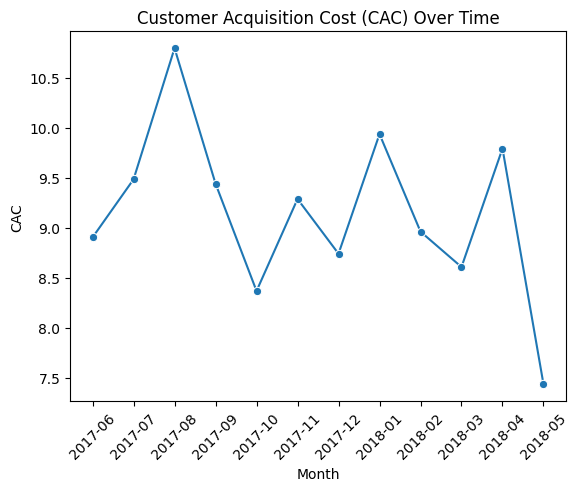

In [92]:
# Plot the Monthly CAC Trend
sns.lineplot(x=cac_per_month['month'].astype(str), y=cac_per_month['CAC'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("CAC")
plt.title("Customer Acquisition Cost (CAC) Over Time")
plt.show()

- The **average CAC** over time is **9.15**.
- **Highest CAC:** August 2017 (10.7) – indicating an expensive acquisition period.
- **Lowest CAC:** May 2018 (7.5) – suggests improved efficiency in customer acquisition.
- **Fluctuations:** CAC varied significantly over time, with notable peaks in **August 2017 and January 2018**.
- **Recent Trend:** CAC has **declined** in the last months, which may indicate better targeting or lower marketing spend.

Calculate CAC by Source

In [93]:
# check the number of sources each user used
user_source_counts = visits.groupby('source_id')['uid'].nunique().reset_index()
user_source_counts.columns =['source_id', 'number_of_users']
user_source_counts.sort_values(by='number_of_users')

,source_id,number_of_users
5,6,6
6,7,34
8,10,8067
7,9,9264
0,1,18999
1,2,26245
4,5,56974
2,3,74756
3,4,83525



- Source ID 3 (83,525 users) and Source ID 4 (74,756 users) are the top-performing sources, driving the most traffic.
- Lower-performing sources (e.g., Source ID 5 and 6) had very few users, suggesting limited reach or ineffective targeting.
- Invest more in Source ID 3 and 4, as they drive the highest number of users.
- Lower-performing sources may need reevaluation—are they bringing high-value users, or should budgets be redirected?

In [94]:
# First Source of Each User
first_source = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()

# Merge first source with orders
orders_with_source = orders.merge(first_source, on='uid', how='left')

# Ensure 'month' column exists and is formatted correctly
orders_with_source['month'] = orders_with_source['buy_ts'].astype('datetime64[M]').astype(str)
costs['month'] = costs['month'].astype(str)  # Ensure costs dataset has correct format

# Get unique buyers per first source and month
buyers_per_source = orders_with_source.groupby(['source_id', 'month'])['uid'].nunique().reset_index()
buyers_per_source.columns = ['source_id', 'month', 'unique_buyers']  # Ensure correct column names

# Calculate Total Costs per Source
costs_by_source = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
costs_by_source

,source_id,month,costs
0,1,2017-06,1125.61
1,1,2017-07,1072.88
2,1,2017-08,951.81
3,1,2017-09,1502.01
4,1,2017-10,2315.75
...,...,...,...
79,10,2018-01,614.35
80,10,2018-02,480.88
81,10,2018-03,526.41
82,10,2018-04,388.25


In [95]:
# Ensure 'first_order_date' is in YYYY-MM format
orders_with_source['first_order_month'] = orders_with_source['first_order_date'].astype('datetime64[M]').astype(str)

# Group by first order month and source ID to count unique buyers
unique_buyers = orders_with_source.groupby(['first_order_month', 'source_id'])['uid'].nunique().reset_index()

# Rename columns for clarity
unique_buyers.columns = ['month', 'source_id', 'unique_buyers']
unique_buyers

,month,source_id,unique_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


In [96]:
costs_by_source['month'] = pd.to_datetime(costs_by_source['month']).dt.to_period('M')
unique_buyers['month'] = pd.to_datetime(unique_buyers['month']).dt.to_period('M')


In [97]:
# Ensure 'month' column is formatted as YYYY-MM in both dataframes
costs_by_source['month'] = costs_by_source['month'].astype(str)
unique_buyers['month'] = unique_buyers['month'].astype(str)

# Merge buyers and marketing costs per source
cac_per_source = costs_by_source.merge(unique_buyers, on=['month', 'source_id'], how='left')

# Calculate CAC by Source
cac_per_source['CAC'] = cac_per_source['costs'] / cac_per_source['unique_buyers']

cac_per_source

,source_id,month,costs,unique_buyers,CAC
0,1,2017-06,1125.61,190,5.924263
1,1,2017-07,1072.88,160,6.705500
2,1,2017-08,951.81,113,8.423097
3,1,2017-09,1502.01,227,6.616784
4,1,2017-10,2315.75,340,6.811029
...,...,...,...,...,...
79,10,2018-01,614.35,92,6.677717
80,10,2018-02,480.88,123,3.909593
81,10,2018-03,526.41,186,2.830161
82,10,2018-04,388.25,107,3.628505


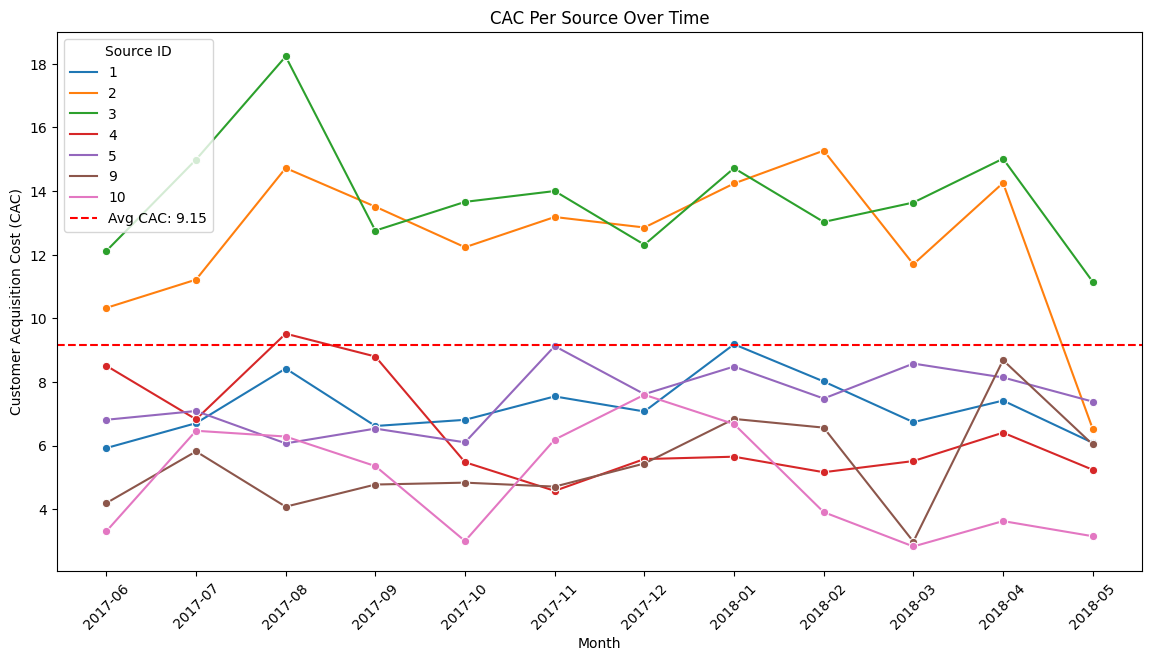

In [98]:
# Plot CAC for each source over time
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=cac_per_source, 
    x='month', 
    y='CAC', 
    hue='source_id', 
    marker='o',
    palette='tab10', 
)

plt.axhline(y=avg_cac_per_month , color='red', linestyle='dashed', label=f'Avg CAC: {avg_cac_per_month :.2f}')

plt.xlabel("Month")
plt.ylabel("Customer Acquisition Cost (CAC)")
plt.title("CAC Per Source Over Time")
plt.xticks(rotation=45)
plt.legend(title="Source ID")
plt.show()

- **Source 3 & Source 2** have the **highest CAC**, often exceeding **15**. These sources are costly but might bring high-value users.
- **Source 9 consistently shows the **lowest CAC** (below 5), making the cheapest acquisition channel.
- **Average CAC** is **9.15** (marked by the red dashed line). Many sources fluctuate around this value.

In [99]:
avg_cac_per_source = cac_per_source.groupby('source_id')['CAC'].mean().reset_index()
avg_cac_per_source.columns = ['source_id', 'avg_CAC']
avg_cac_per_source

,source_id,avg_CAC
0,1,7.212107
1,2,12.504068
2,3,13.802743
3,4,6.439374
4,5,7.451938
5,9,5.413892
6,10,4.867125


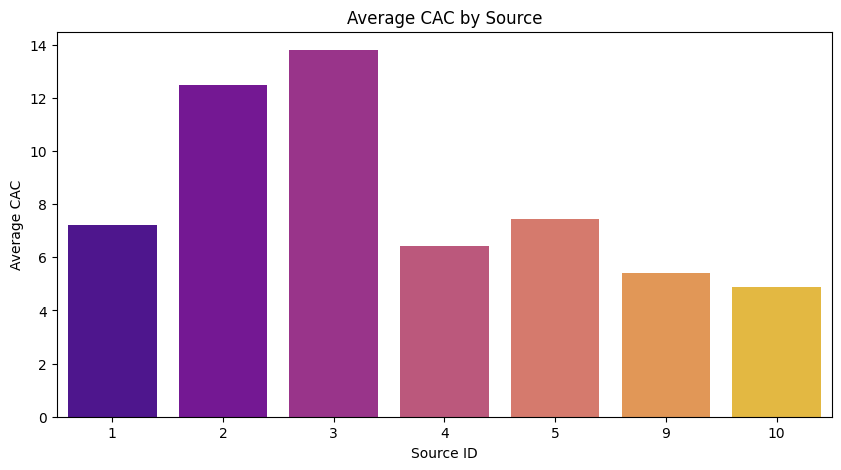

In [100]:
#Plot Average CAC Per Source 
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_cac_per_source, 
    x='source_id', 
    y='avg_CAC', 
    palette="plasma"
)
plt.xlabel("Source ID")
plt.ylabel("Average CAC")
plt.title("Average CAC by Source")
plt.show()

**Conclusion: CAC Cohort Analysis**

- **Source 3 has the highest CAC ( about 14), followed by Source 2 ( about13).**  
  - These sources require significant spending to acquire a single customer.
- **Sources 9 and 10 have the lowest CAC (~5), making them the most cost-efficient acquisition channels.**
- **Source 5 falls in the middle (~7), suggesting moderate efficiency.**

**Recommendations**
1. **Reduce spending on Source 3 and 2** unless they generate high-value customers.
2. **Increase investment in Source 9 and 10**, as they bring in users at a lower cost.
3. **Monitor Source 5**, which is balanced in cost but may need further analysis on user retention.


# - **How worthwhile where the investments? (ROI)**

We will investigate ROI per cohort.

In genereal, ROI=LTV/CAC

In [101]:
# Convert to Period (YYYY-MM) for accurate matching
report['order_month'] = pd.to_datetime(report['order_month']).dt.to_period('M').astype(str)


# Convert CAC data to correct format
cac_per_month['month'] = cac_per_month['month'].astype(str)

# Merge LTV and CAC using 'order_month'
roi_per_month = report.merge(
    cac_per_month, left_on='order_month', right_on='month', how='left'
)

roi_per_month

,first_order_month,order_month,revenue,total_orders,n_buyers,age,ltv,month,costs,unique_buyers,CAC
0,2017-06-01,2017-06,9557.49,2354,2023,0,4.724414,2017-06,18015.00,2023.0,8.905091
1,2017-06-01,2017-07,981.82,177,2023,1,0.485329,2017-07,18240.59,1923.0,9.485486
2,2017-06-01,2017-08,885.34,174,2023,2,0.437637,2017-08,14790.54,1370.0,10.796015
3,2017-06-01,2017-09,1931.30,226,2023,3,0.954671,2017-09,24368.91,2581.0,9.441654
4,2017-06-01,2017-10,2068.58,292,2023,4,1.022531,2017-10,36322.88,4340.0,8.369327
...,...,...,...,...,...,...,...,...,...,...,...
74,2018-03-01,2018-05,1114.87,176,3533,2,0.315559,2018-05,22224.27,2988.0,7.437841
75,2018-04-01,2018-04,10600.69,2495,2276,0,4.657597,2018-04,22289.38,2276.0,9.793225
76,2018-04-01,2018-05,1209.92,195,2276,1,0.531599,2018-05,22224.27,2988.0,7.437841
77,2018-05-01,2018-05,13925.76,3249,2988,0,4.660562,2018-05,22224.27,2988.0,7.437841


In [102]:
# I see Nan values in one of the cohort
# Count NaN values in CAC
nan_cac_count = roi_per_month['CAC'].isna().sum()
print(f"Number of NaN values in CAC before fixing: {nan_cac_count}")
# Display rows where first_order_month is '2018-06-01'
roi_per_month[roi_per_month['first_order_month'] == "2018-06-01"]


Number of NaN values in CAC before fixing: 1


,first_order_month,order_month,revenue,total_orders,n_buyers,age,ltv,month,costs,unique_buyers,CAC
78,2018-06-01,2018-06,3.42,1,1,0,3.42,NaN,NaN,NaN,NaN


We have one cohort 2018-06-01 with Marketing Costs = NaN (No recorded marketing expenses). so CAC cannot be calculated → NaN appears.
To avoid it 

In [103]:
# Remove the June 2018 cohort
roi_per_month = roi_per_month.dropna()

# Calculate ROI (LTV / CAC)
roi_per_month.loc[:, 'ROI']  = roi_per_month['ltv'] / roi_per_month['CAC']

# Display ROI table
roi_per_month[['first_order_month', 'order_month', 'age', 'ltv', 'CAC', 'ROI']]

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,first_order_month,order_month,age,ltv,CAC,ROI
0,2017-06-01,2017-06,0,4.724414,8.905091,0.530530
1,2017-06-01,2017-07,1,0.485329,9.485486,0.051165
2,2017-06-01,2017-08,2,0.437637,10.796015,0.040537
3,2017-06-01,2017-09,3,0.954671,9.441654,0.101113
4,2017-06-01,2017-10,4,1.022531,8.369327,0.122176
...,...,...,...,...,...,...
73,2018-03-01,2018-04,1,0.300892,9.793225,0.030724
74,2018-03-01,2018-05,2,0.315559,7.437841,0.042426
75,2018-04-01,2018-04,0,4.657597,9.793225,0.475594
76,2018-04-01,2018-05,1,0.531599,7.437841,0.071472


In [104]:
roi_piv = roi_per_month.pivot_table(
    index = 'first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 
roi_piv.fillna('')
roi_piv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.62,0.72,0.85,0.92,1.03,1.09,1.15,1.22,1.28,1.32
2017-07-01,0.63,0.66,0.73,0.77,0.79,0.81,0.82,0.84,0.86,0.87,0.89,NaN
2017-08-01,0.49,0.54,0.59,0.64,0.69,0.72,0.74,0.79,0.82,0.85,NaN,NaN
2017-09-01,0.60,0.73,0.79,1.24,1.28,1.35,1.44,1.46,1.49,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.69,0.71,0.72,0.73,0.75,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.66,0.67,0.68,0.70,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.67,0.80,0.83,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.50,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


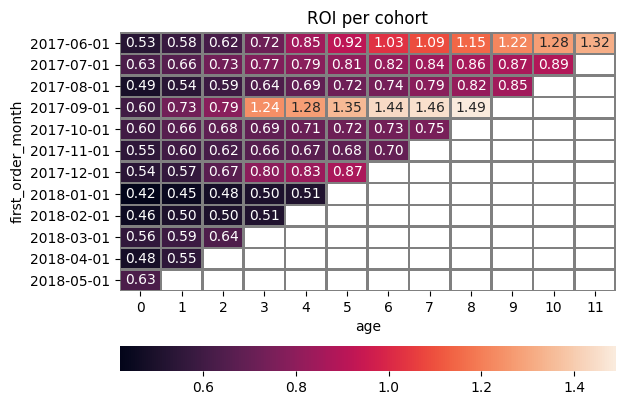

In [105]:
roi_piv.index = roi_piv.index.astype(str)
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()


In [106]:
# Let's calculate average ROI
avg_roi = (avg_ltv / avg_cac_per_month).round(2)
avg_roi

0.13

**ROI Analysis Conclusion**

- The earlier cohorts (2017-06 to 2017-09) show a steady increase in ROI, reaching values above 1.2 by the 9th–11th month. This means these cohorts became profitable over time.
- The 2017-10 to 2017-12 cohorts have a slower ROI growth, with values staying below 1. This suggests these users were less valuable or had higher acquisition costs.
- The 2018 cohorts (from January onward) show low ROI values in the first few months. It is too early to tell if they will become profitable, but they have a slower start compared to 2017 cohorts.
- The best-performing cohort is 2017-09, reaching 1.49 ROI in the 8th month. This indicates a strong return on investment for that period.


The Average LTV over time is 1.15, while the Average CAC over time is 9.15.
This means that, on average, each customer generates only 1.15 in revenue while the acquisition cost is 9.15.
**Since LTV < CAC, our cohorts are not profitable within the observed timeframe.**
The LTV/CAC ratio is:

 1.15/9.15 = 0.13

This indicates that for every 1 dollar spent on customer acquisition, we are only getting back 0.13 dollars in revenue.

**ROI by source (ROMI)**

In [107]:
# Calculate total revenue and unique buyers per source
ltv_per_source = orders_with_source.groupby('source_id').agg(
    total_revenue=('revenue', 'sum'),
    unique_buyers=('uid', 'nunique')
).reset_index()

# Calculate LTV (Revenue per unique buyer)
ltv_per_source['LTV'] = ltv_per_source['total_revenue'] / ltv_per_source['unique_buyers']

# Display LTV per source
ltv_per_source


,source_id,total_revenue,unique_buyers,LTV
0,1,31090.55,2899,10.724577
1,2,46923.61,3506,13.383802
2,3,54511.24,10473,5.204931
3,4,56696.83,10296,5.506685
4,5,52624.02,6931,7.592558
5,7,1.22,1,1.220000
6,9,5759.40,1088,5.293566
7,10,4450.33,1329,3.348631


In [108]:

# Merge LTV with CAC per source
romi_per_source = cac_per_source.merge(ltv_per_source, on='source_id', how='left')

# Display merged table
romi_per_source


,source_id,month,costs,unique_buyers_x,CAC,total_revenue,unique_buyers_y,LTV
0,1,2017-06,1125.61,190,5.924263,31090.55,2899,10.724577
1,1,2017-07,1072.88,160,6.705500,31090.55,2899,10.724577
2,1,2017-08,951.81,113,8.423097,31090.55,2899,10.724577
3,1,2017-09,1502.01,227,6.616784,31090.55,2899,10.724577
4,1,2017-10,2315.75,340,6.811029,31090.55,2899,10.724577
...,...,...,...,...,...,...,...,...
79,10,2018-01,614.35,92,6.677717,4450.33,1329,3.348631
80,10,2018-02,480.88,123,3.909593,4450.33,1329,3.348631
81,10,2018-03,526.41,186,2.830161,4450.33,1329,3.348631
82,10,2018-04,388.25,107,3.628505,4450.33,1329,3.348631


In [109]:
# Calculate ROMI (LTV / CAC)
romi_per_source['ROMI'] = romi_per_source['LTV'] / romi_per_source['CAC']

# Handle division issues (replace NaN and infinite values)
romi_per_source['ROMI'].fillna(0, inplace=True)
romi_per_source.replace([float('inf'), -float('inf')], 0, inplace=True)

# Display ROMI per source
romi_per_source


,source_id,month,costs,unique_buyers_x,CAC,total_revenue,unique_buyers_y,LTV,ROMI
0,1,2017-06,1125.61,190,5.924263,31090.55,2899,10.724577,1.810280
1,1,2017-07,1072.88,160,6.705500,31090.55,2899,10.724577,1.599370
2,1,2017-08,951.81,113,8.423097,31090.55,2899,10.724577,1.273234
3,1,2017-09,1502.01,227,6.616784,31090.55,2899,10.724577,1.620814
4,1,2017-10,2315.75,340,6.811029,31090.55,2899,10.724577,1.574590
...,...,...,...,...,...,...,...,...,...
79,10,2018-01,614.35,92,6.677717,4450.33,1329,3.348631,0.501463
80,10,2018-02,480.88,123,3.909593,4450.33,1329,3.348631,0.856516
81,10,2018-03,526.41,186,2.830161,4450.33,1329,3.348631,1.183194
82,10,2018-04,388.25,107,3.628505,4450.33,1329,3.348631,0.922868


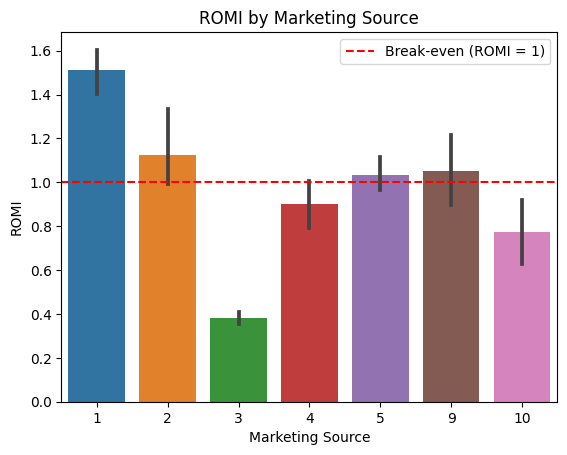

In [110]:
sns.barplot(data=romi_per_source, x='source_id', y='ROMI')
plt.axhline(y=1, color='red', linestyle='dashed', label="Break-even (ROMI = 1)")
plt.xlabel("Marketing Source")
plt.ylabel("ROMI")
plt.title("ROMI by Marketing Source")
plt.legend()
plt.show()

**ROMI by Marketing Source**
- **Source 1 and 2** have the highest ROMI values (**above 1.2**), meaning they generate **more revenue than marketing costs** and are **profitable investments**.  
- **Source 3 has the lowest ROMI (~0.3)**, meaning it is **highly unprofitable** and should be reconsidered or optimized.  
- **Sources 4, 5, and 9** have ROMI values **close to 1**, meaning they are at or near **break-even**. These sources may need further optimization to become profitable.  
- **Source 10** has **ROMI < 1**, meaning marketing spend on this source is not generating enough revenue.  
- **Error bars indicate uncertainty:**  
  - **Source 1 has a small error bar**, showing **high confidence** in its strong performance.  
  - **Sources 2, 4, and 9 have larger error bars**, meaning **their performance may vary significantly** over time.  

# Final Conclusion: Marketing Optimization for Yandex.Afisha

This project focused on analyzing marketing efficiency, user behavior, and sales performance to optimize marketing expenses and improve Return on Marketing Investment (ROMI). Below are the key insights, findings, and strategic recommendations based on a detailed analysis of user engagement, conversion, retention, and financial performance.

---

## Key Findings 

### 1. User Engagement & Retention
- User activity increased until late 2017, peaking in November 2017 before declining in early 2018.
- DAU (Daily Active Users), WAU (Weekly Active Users), and MAU (Monthly Active Users) show similar trends, with a significant drop in March 2018 possibly due to technical issues or seasonality.
- Cohort retention is weak, with steep drops after the first month. Most users do not return long-term.
- Older cohorts (June–October 2017) retained users longer than newer cohorts (February–April 2018).

---

### 2. Sales Performance & Purchase Behavior
- Conversion rate: 16% of users make a purchase.
- 72% of buyers purchase on the same day, while the remaining take longer to convert.
- Average purchase size peaked in December 2017, likely due to holiday promotions.
- Orders per customer increase over time, but newer cohorts (April–June 2018) show weaker repeat purchases.
- Older cohorts (June–October 2017) are more profitable, making multiple purchases over time.

---

### 3. Marketing Spend & CAC (Customer Acquisition Cost)
- Total marketing spend varied significantly, with a peak in November 2017 and a drop in March 2018.
- Source 3 received the highest budget, while Sources 9 and 10 had minimal spending.
- Customer Acquisition Cost (CAC) averaged 9.32, meaning it costs $9.32 to acquire a customer.
- Sources 3 and 2 had the highest CAC (\~14), while Sources 9 and 10 were the cheapest (\~5).

---

### 4. Profitability Analysis: LTV, ROI, and ROMI
- LTV (Lifetime Value) per customer is 1.15, meaning each customer generates $1.15 in revenue.
- ROI (Return on Investment) per cohort shows that earlier cohorts (2017-06 to 2017-09) reached profitability (ROI > 1.2).
- Cohorts from February–April 2018 had lower profitability, struggling to break even.
- ROMI (Return on Marketing Investment) by source:
  - Best performing sources: Source 1 and 2 (ROMI > 1.2) – Profitable investments.
  - Worst performing sources: Source 3 and 10 (ROMI < 0.5) – Unprofitable sources, should be reconsidered.
  - Break-even sources: Sources 4, 5, and 9 (ROMI ~1.0) – Need further cost optimization.

---

## Final Recommendations: Where to Invest & Optimize

### Increase Budget for High-Performing Sources (1 and 2)
- These sources have the highest ROMI and lowest CAC, meaning they generate more revenue per dollar spent.
- Recommendation: Increase budget allocation by 20-30% to maximize revenue growth.

---

### Optimize and Monitor Break-even Sources (4, 5, 9)
- These sources are near break-even, meaning they could become profitable with optimization.
- Actions:
  - A/B test ad creatives to improve conversion.
  - Refine audience targeting to increase efficiency.
  - Monitor for 2-3 months before increasing or reducing spending.

---

### Reduce or Stop Spending on Unprofitable Sources (3 and 10)
- These sources cost more than they generate, leading to a negative ROI.
- Actions:
  - Cut spending by at least 50% to free up budget.
  - If no improvement in 1-2 months, completely discontinue investment.
  - Explore alternative acquisition channels with better efficiency.

---

### When to Invest More
- Best months for marketing spend:
  - November 2017 saw a significant spike in traffic and sales.
  - May 2018 also saw increased activity—possible organic growth or seasonal interest.
- Worst months for marketing spend:
  - March–April 2018 saw drops in DAU and WAU, meaning users were less active.
- Recommendation:
  - Increase budget for promotions in peak months (November and May).
  - Reduce ad spending during slow months (March–April).

---

## Key Insights & Business Impact

- **CAC = \$9.32**, too high for profitability.  
- **LTV = \$1.15**, meaning each customer generates only \$1.15 in revenue.  
- **LTV/CAC ratio = 0.12**, indicating inefficient acquisition strategies.  
- **Best ROI cohorts: June–Oct 2017 (ROI > 1.2)**, strong retention and revenue.  
- **Worst ROI cohorts: Feb–April 2018 (ROI < 0.6)**, weak retention and low revenue.  
- **Profitable sources: Source 1 & 2 (ROMI > 1.2)**, best returns on investment.  
- **Unprofitable sources: Source 3 & 10 (ROMI < 0.5)**, inefficient and costly.  

## Final Strategic Actions
- Increase spending on high-ROI sources (1 and 2) by 20-30 %.
- Optimize break-even sources (4, 5, 9) through A/B testing and targeting improvements.
- Cut budget for unprofitable sources (3 and 10).
- Reallocate budget based on seasonal trends (more in November and May, less in March–April).
- Improve retention strategies to increase customer LTV and long-term profitability.

By implementing these strategies, Yandex.Afisha can reduce marketing waste, improve efficiency, and maximize return on investment.
